In [4]:
import numpy as np
np.random.seed(2024 - 4 - 16)
import matplotlib.pyplot as plt

In [1]:
# the choice of learning rate alpha will have a big impact on the efficiency and accuracy of a training process
# and poorly chosen alpha may lead to a model not working at all!

In [2]:
# for the sake of simplicity, let's consider a cost function taht uses only weight term without a bias part,
# f(w) =>

# $w = w - \alpha \times \frac{\mathrm{d}}{\mathrm{dw}}f(w)$

In [3]:
# the alpha here is the learning rate.
# let's see what will happen if the learning rate alpha is too small or too large!

In [82]:
# let's simulate a y = x * 1.876425 model (non-linear)
M = 1.876425
x = np.arange(start = -100, stop = 100, step = 0.10)
y =  M * x + np.random.normal(loc = 0.0, scale = 2, size = x.size)  # introducing some random noise

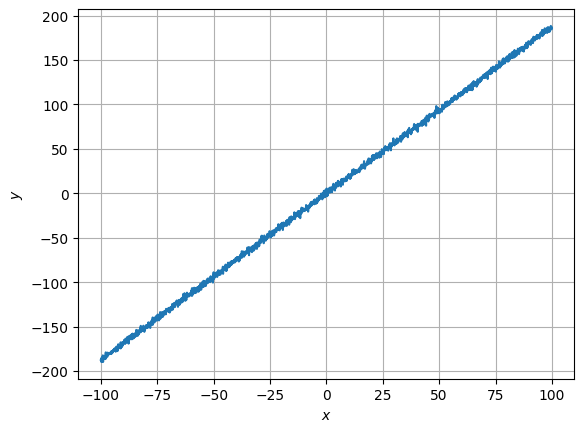

In [83]:
fig, axes = plt.subplots()
axes.plot(x, y)
axes.set_xlabel("$x$")
axes.set_ylabel("$y$")
axes.grid()
plt.show()

In [84]:
# let's define our cost function

cost_fn = lambda target, m, x : np.square((m * x) - target).sum() / (2 * target.size)

In [85]:
cost_fn(y, M, x)

1.9855088436377875

In [102]:
# costs

errs = np.array([cost_fn(y, _, x) for _ in np.linspace(start = 1, stop = 2.5, num = x.size)])
errs.min()

1.984101806215285

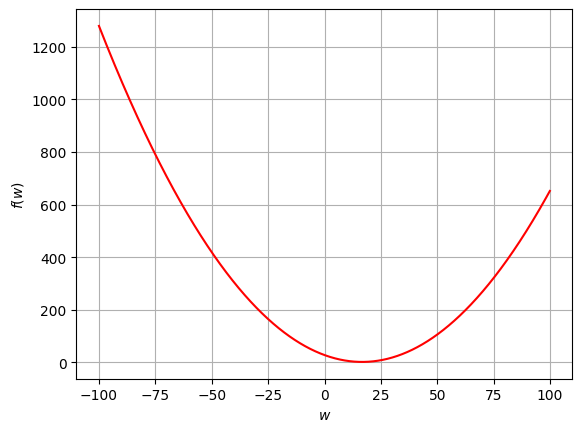

In [104]:
fig, axes = plt.subplots()
axes.plot(x, errs, color = "red")
axes.set_xlabel("$w$")
axes.set_ylabel("$f(w)$")
axes.grid()
plt.show()